In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk as nk
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [108]:
df= pd.read_csv('/home/bek/Desktop/KAiM/KAIM-W1/data/raw_analyst_ratings.csv')

In [55]:
df.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [56]:
df.shape

(1407328, 6)

In [57]:
df.isnull().sum()

Unnamed: 0    0
headline      0
url           0
publisher     0
date          0
stock         0
dtype: int64

In [58]:
df['headline_length'] = df['headline'].apply(lambda x: len(x.split()))
df['headline_length'].head()

0     7
1     7
2     5
3     7
4    14
Name: headline_length, dtype: int64

In [89]:
df['headline_length'].describe()

count    1.407328e+06
mean     1.141671e+01
std      6.352997e+00
min      1.000000e+00
25%      7.000000e+00
50%      1.000000e+01
75%      1.300000e+01
max      7.700000e+01
Name: headline_length, dtype: float64

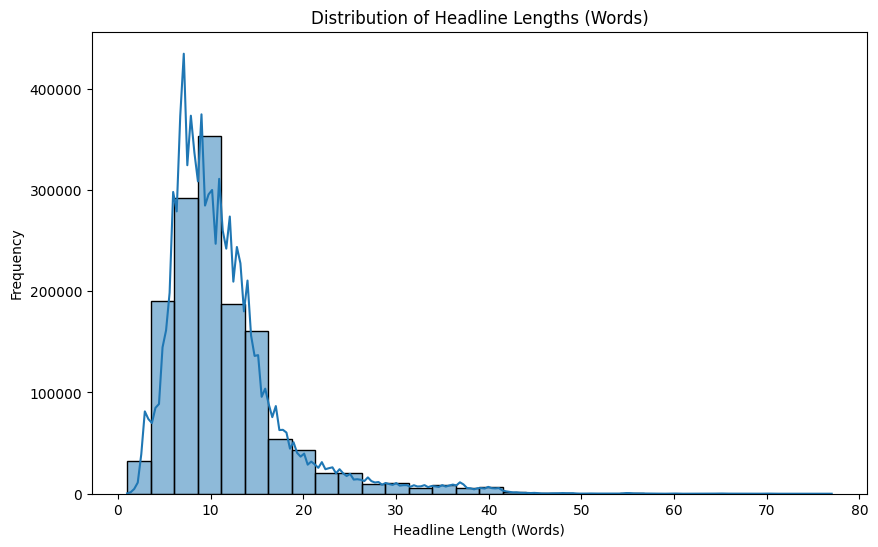

In [59]:
# Visualize headline length distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['headline_length'], bins=30, kde=True)
plt.title('Distribution of Headline Lengths (Words)')
plt.xlabel('Headline Length (Words)')
plt.ylabel('Frequency')
plt.show()

In [90]:
# Count the number of articles per publisher
publisher_counts = df['publisher'].value_counts()
print(publisher_counts)

publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
                      ...  
MoneyGeek                 1
muathe                    1
Robert Morris             1
LeftCoastHedgie           1
Jeremie Capron            1
Name: count, Length: 1034, dtype: int64


In [110]:
# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'], utc=True, errors='coerce')

# Extract date parts
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['weekday'] = df['date'].dt.day_name()


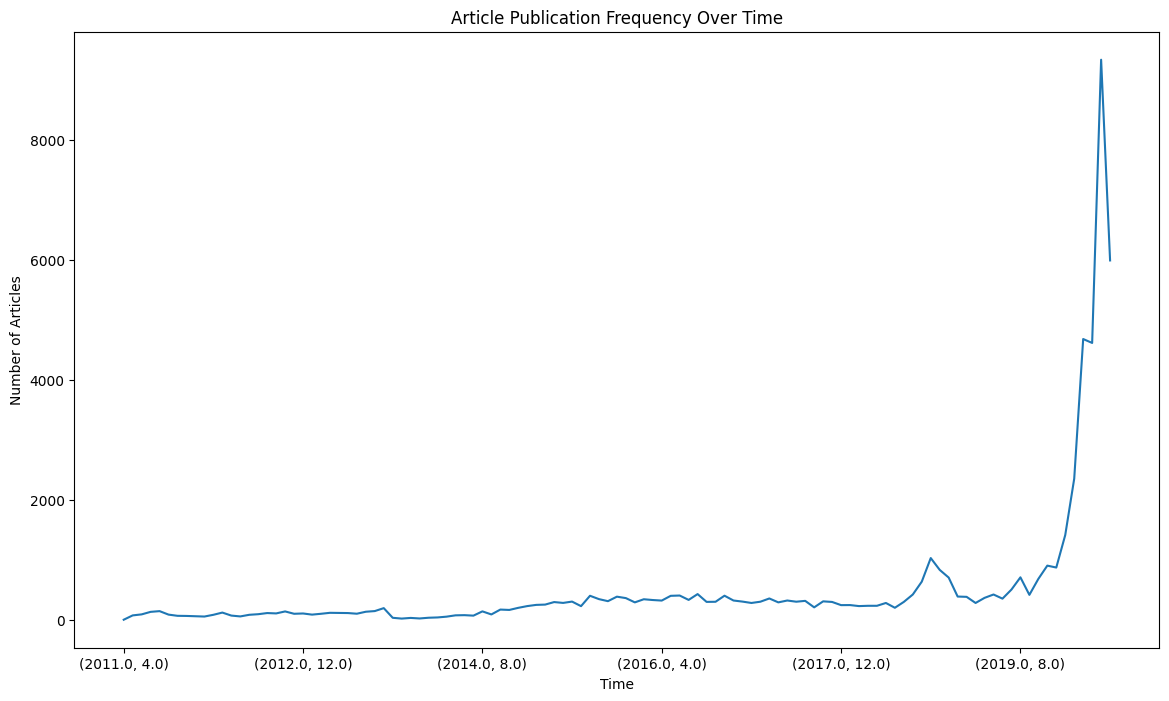

In [111]:
# Analyze the publication date trends
publication_trends = df.groupby(['year', 'month']).size()

# Visualize publication frequency over time
plt.figure(figsize=(14, 8))
publication_trends.plot(kind='line')
plt.title('Article Publication Frequency Over Time')
plt.xlabel('Time')
plt.ylabel('Number of Articles')
plt.show()

### Sentiment analysis on Headlines

In [95]:
nk.download('punkt')

[nltk_data] Downloading package punkt to /home/bek/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [96]:
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

In [112]:
df['sentiment'] = df['headline'].apply(get_sentiment)

KeyboardInterrupt: 

In [113]:
print(df[['headline', 'sentiment']].head())

KeyError: "['sentiment'] not in index"

In [114]:
# Create a count plot for sentiment distribution
plt.figure(figsize=(10, 6))

# Use countplot to visualize the sentiment distribution with a dummy hue variable
sns.countplot(x='sentiment', hue=1, data=df, palette='viridis')

# Add titles and labels
plt.title('Distribution of Sentiment in Headlines')
plt.xlabel('Sentiment')
plt.ylabel('Number of Headlines')

# Remove the legend as it's not necessary for this plot
plt.legend(title=None, loc='upper right', bbox_to_anchor=(1.1, 1), frameon=False)

# Show the plot
plt.show()

ValueError: Could not interpret value `sentiment` for `x`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>

### Identify common keywords

### Time Series Analysis

In [115]:
# Print the DataFrame columns to verify the presence of 'date'
print(df.columns)



Index(['Unnamed: 0', 'headline', 'url', 'publisher', 'date', 'stock', 'year',
       'month', 'day', 'weekday'],
      dtype='object')


/tmp/ipykernel_21377/2503852486.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_counts = df.resample('M').size()


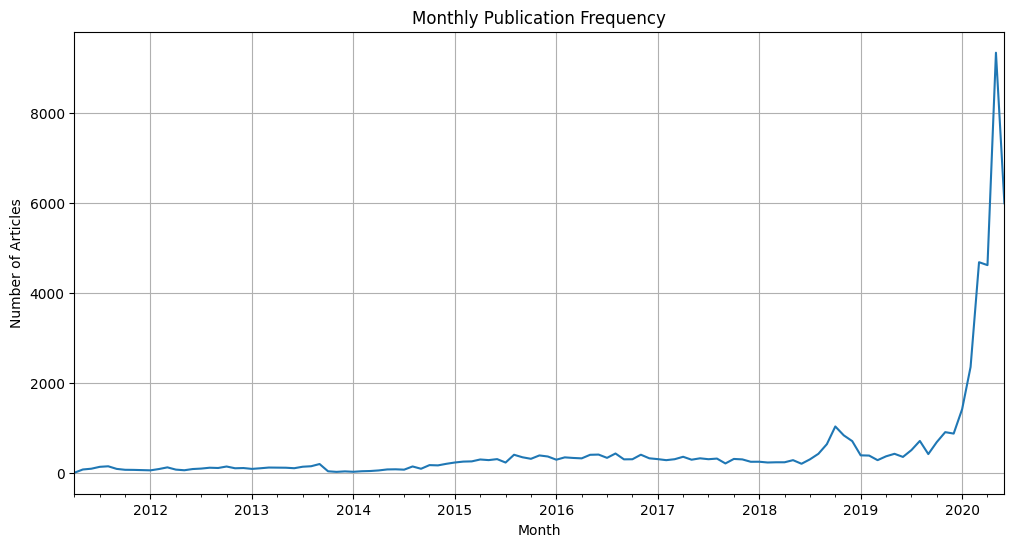

In [118]:

df.dropna(subset=['date'], inplace=True)
df.set_index('date', inplace=True)
monthly_counts = df.resample('M').size()

# Plot monthly publication counts
plt.figure(figsize=(12, 6))
monthly_counts.plot(title='Monthly Publication Frequency')
plt.xlabel('Month')
plt.ylabel('Number of Articles')
plt.grid(True)
plt.show()


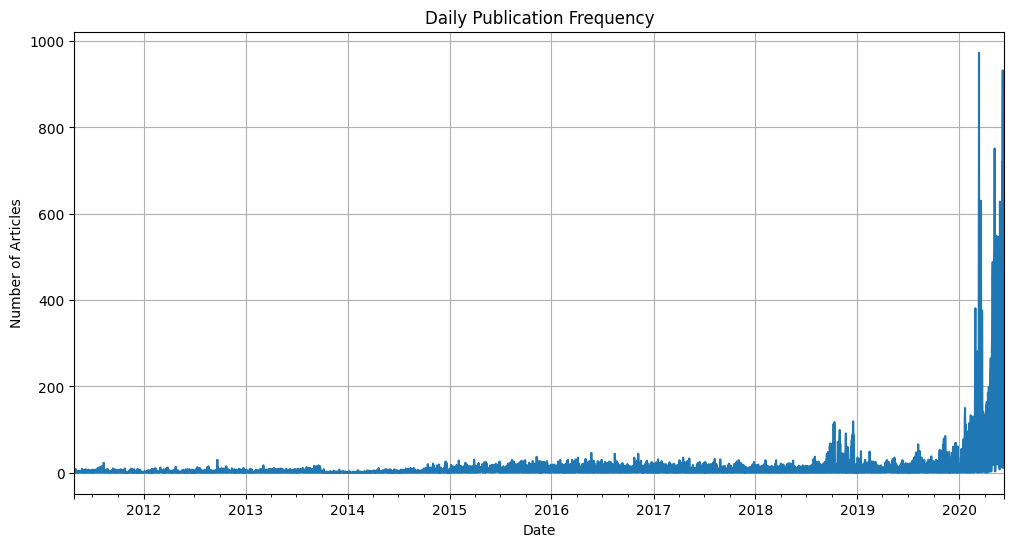

In [119]:
daily_counts = df.resample('D').size()

# Plot daily publication counts
plt.figure(figsize=(12, 6))
daily_counts.plot(title='Daily Publication Frequency')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.grid(True)
plt.show()

## publisher analysis

publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Vick Meyer            24826
webmaster             20313
Benzinga_Newsdesk     19410
Zacks                 19390
Jayson Derrick        19050
Allie Wickman         18317
Shanthi Rexaline      16640
Craig Jones           16221
Wayne Duggan          12897
Nelson Hem            12590
Name: count, dtype: int64


/tmp/ipykernel_21377/2453481343.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_publishers.index, y=top_publishers.values, palette='viridis')


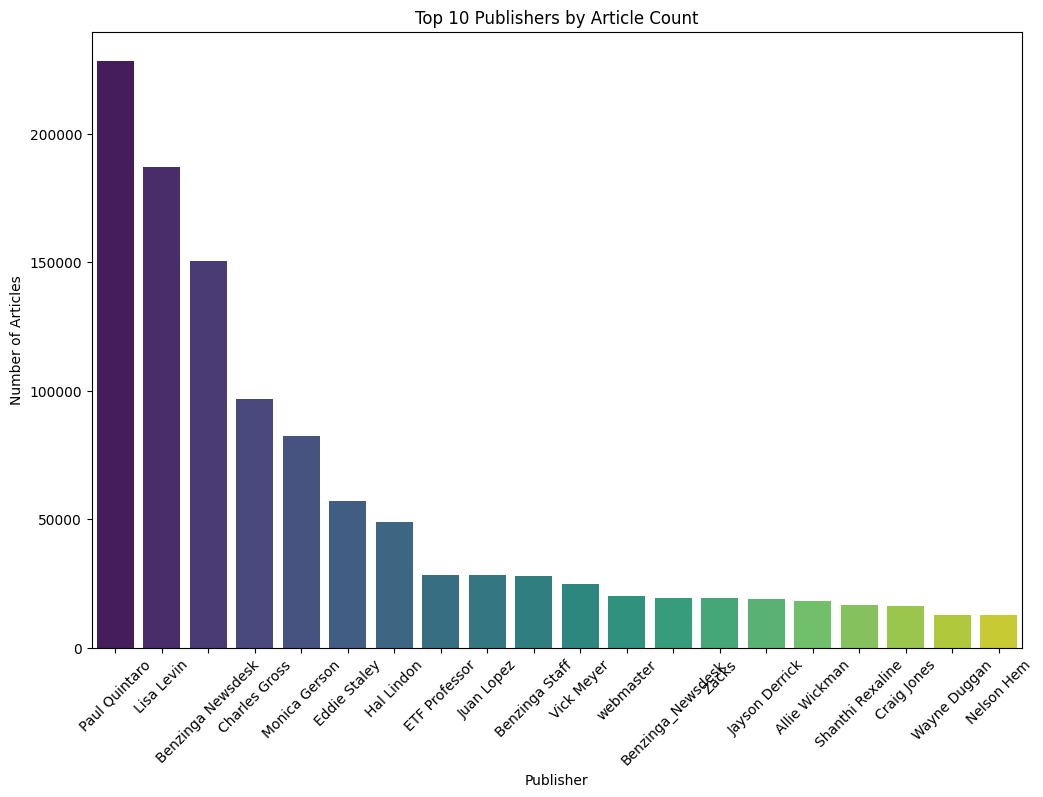

In [92]:
# Top publishers
top_publishers = publisher_counts.head(20)
print(top_publishers)

# Visualize the number of articles per top publisher
plt.figure(figsize=(12, 8))
sns.barplot(x=top_publishers.index, y=top_publishers.values, palette='viridis')
plt.title('Top 10 Publishers by Article Count')
plt.xlabel('Publisher')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.show()

In [122]:
# If publisher names are emails, extract domains
df['domain'] = df['publisher'].str.extract(r'@([a-zA-Z0-9.-]+)')

# Check if the extraction was successful
df[['publisher', 'domain']].head()

# Count unique domains
domain_counts = df['domain'].value_counts().head(1)
domain_counts


domain
benzinga.com    1196
Name: count, dtype: int64